**Table of contents**<a id='toc0_'></a>    
- [TEXT SUMMARIZATION](#toc1_)    
  - [Prompt Template Text Summarization](#toc1_1_)    
  - [StuffDocumentChain Text summarization](#toc1_2_)    
    - [Refine Chain For Summarization](#toc1_2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[TEXT SUMMARIZATION](#toc0_)

- Text summarization is an NLP technique that automatically creates concise versions of longer texts while preserving key information and meaning. This app uses LangChain and Groq's language model to generate summaries from YouTube videos or web content, making it easier to quickly understand the main points of lengthy materials.

https://python.langchain.com/docs/tutorials/summarization/ 

Text summarization methods in LangChain are used to summarize texts using different strategies.

**1. Stuff**
- Summarizes all text in a single model call.
- **Advantages**: Fast and low cost.
- **Disadvantages**: Doesn't work when token limit is exceeded.
- **When to Use**: For short texts or data that doesn't exceed the model's token limit.

**2. Map-Reduce**
- Divides text into small chunks (Map), summarizes each piece separately and combines the results (Reduce).
- **Advantages**: Suitable for summarizing large texts.
- **Disadvantages**: Requires more processing time and cost.
- **When to Use**: For long texts and when token limit is exceeded.

**3. Refine**
- Creates an initial draft summary, then refines it to create the final version.
- **Advantages**: Produces more detailed and quality summaries.
- **Disadvantages**: Requires more model calls, increases cost.
- **When to Use**: When precise and accurate summaries are needed.

**4. QA-Based Summarization**
- Creates summaries focused on user-defined questions.
- **Advantages**: Provides specific and directed summaries.
- **Disadvantages**: Requires users to provide appropriate questions.
- **When to Use**: When summaries need to answer specific questions or information.

**Comparison**

| **Method**      | **Advantages**                   | **Disadvantages**                 | **Use Case**                     |
|-----------------|----------------------------------|-----------------------------------|----------------------------------|
| **Stuff**       | Fast and simple                  | Limited by token limit            | For short texts                  |
| **Map-Reduce**  | Suitable for large texts         | Slower and more costly            | For long texts                   |
| **Refine**      | Precise and quality summaries    | High processing cost              | For detailed and accurate summaries |
| **QA-Based**    | Focuses on questions             | Requires well-defined questions   | When specific information is needed |

These methods are chosen based on factors such as text length, precision requirements, and processing cost.

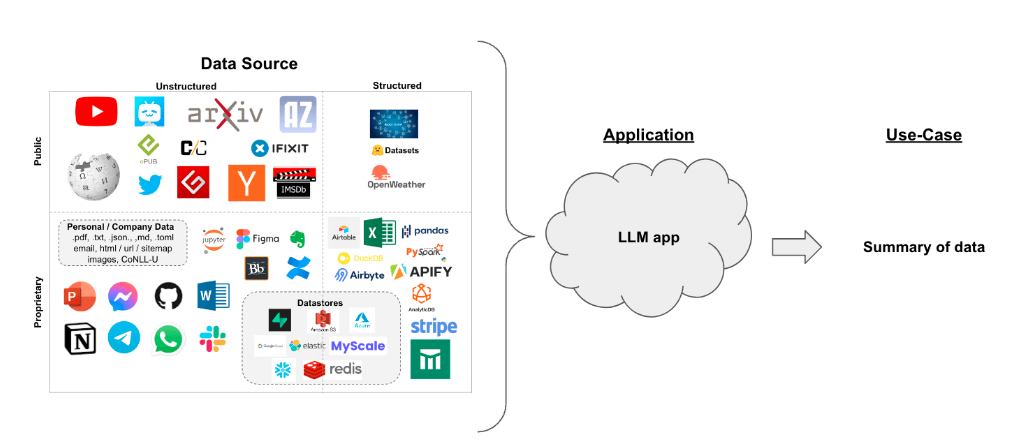

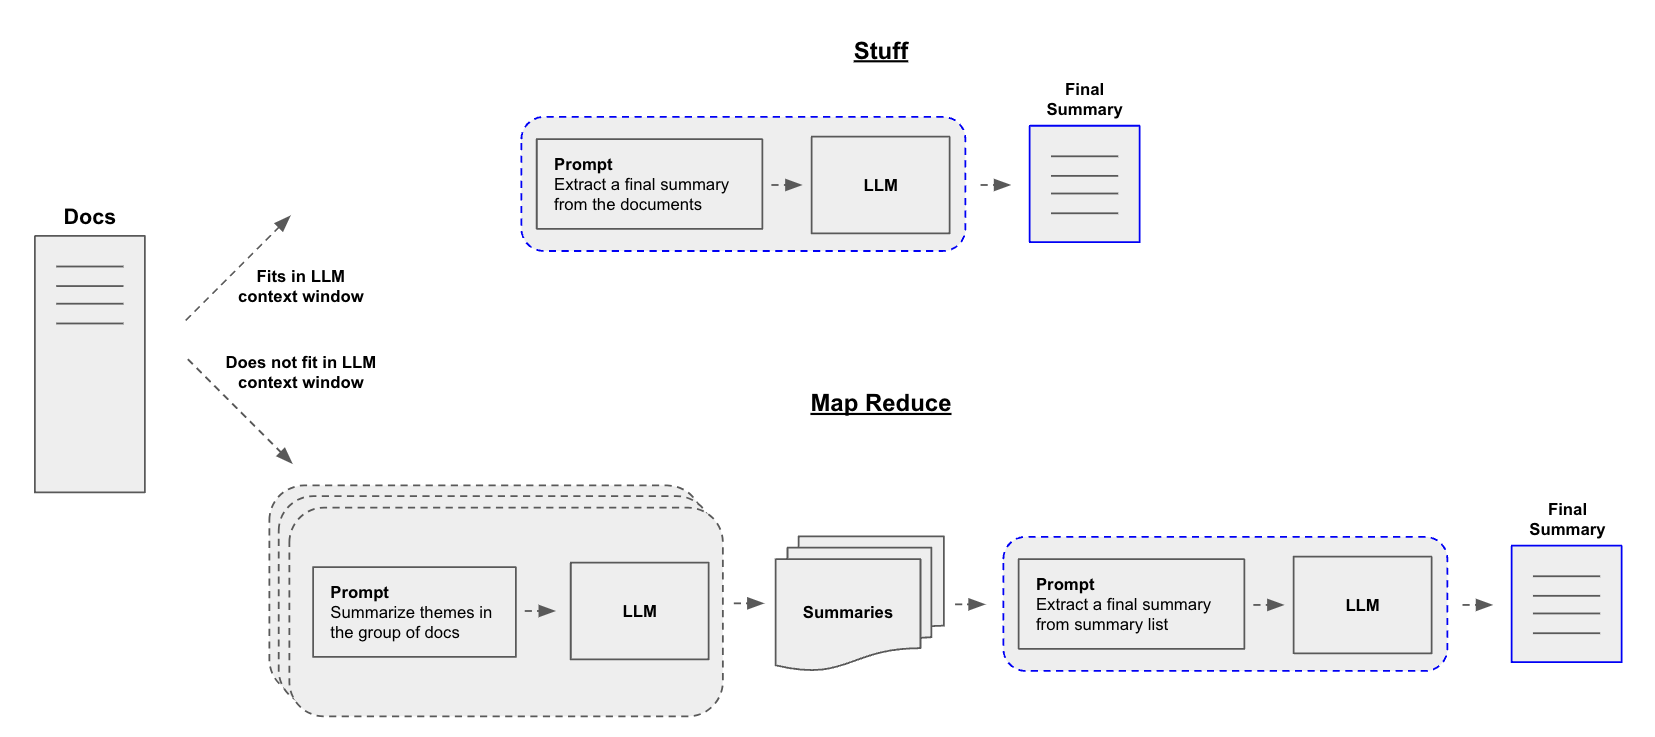

In [1]:
# Load required environment variables and API keys from .env file

import os
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
# Initialize Groq language model with Gemma-7b-It configuration

from langchain_groq import ChatGroq

api_key=os.getenv("GROQ_API_KEY")
llm=ChatGroq(groq_api_key=api_key,model="Gemma-7b-It")
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x0000027A929D09E0>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x0000027A929D14F0>, model_name='Gemma-7b-It', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [3]:
# Import message schema classes from LangChain for structured chat interactions

from langchain.schema import(AIMessage, HumanMessage, SystemMessage)

In [4]:
speech="""
People across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.

In our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the government offices for this purpose. The government should reach him. Since you have assigned this responsibility to me, about four crore families have got their ‘pucca’ houses. However, I have encountered cases where someone is left out of the government benefits. Therefore, I have decided to tour the country again, to listen to people’s experiences with government schemes, to understand whether they received the intended benefits, and to ensure that the programs are reaching everyone as planned without paying any bribes. We will get the real picture if we visit them again. Therefore, this ‘Viksit Bharat Sankalp Yatra’ is, in a way, my own examination. I want to hear from you and the people across the country whether what I envisioned and the work I have been doing aligns with reality and whether it has reached those for whom it was meant.

It is crucial to check whether the work that was supposed to happen has indeed taken place. I recently met some individuals who utilized the Ayushman card to get treatment for serious illnesses. One person met with a severe accident, and after using the card, he could afford the necessary operation, and now he is recovering well. When I asked him, he said: “How could I afford this treatment? Now that there is the Ayushman card, I mustered courage and underwent an operation. Now I am perfectly fine.”  Such stories are blessings to me.

The bureaucrats, who prepare good schemes, expedite the paperwork and even allocate funds, also feel satisfied that 50 or 100 people who were supposed to get the funds have got it. The funds meant for a thousand villages have been released. But their job satisfaction peaks when they hear that their work has directly impacted someone’s life positively. When they see the tangible results of their efforts, their enthusiasm multiplies. They feel satisfied. Therefore, ‘Viksit Bharat Sankalp Yatra’ has had a positive impact on government officers. It has made them more enthusiastic about their work, especially when they witness the tangible benefits reaching the people. Officers now feel satisfied with their work, saying, “I made a good plan, I created a file, and the intended beneficiaries received the benefits.” When they find that the money has reached a poor widow under the Jeevan Jyoti scheme and it was a great help to her during her crisis, they realise that they have done a good job. When a government officer listens to such stories, he feels very satisfied.

There are very few who understand the power and impact of the ‘Viksit Bharat Sankalp Yatra’. When I hear people connected to bureaucratic circles talking about it, expressing their satisfaction, it resonates with me. I’ve heard stories where someone suddenly received 2 lakh rupees after the death of her husband, and a sister mentioned how the arrival of gas in her home transformed her lives. The most significant aspect is when someone says that the line between rich and poor has vanished. While the slogan ‘Garibi Hatao’ (Remove Poverty) is one thing, but the real change happens when a person says, “As soon as the gas stove came to my house, the distinction between poverty and affluence disappeared.
"""

In [5]:
speech

'\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses. And he should not need to make rounds of the gove

In [6]:
chat_message=[
    SystemMessage(content="You are expert with experise in summarizing speeched"),
    HumanMessage(content=f"Please provide a short and concisse summary of the follow speech:\n Text:{speech}")
]

In [8]:
llm.get_num_tokens(speech)

909

In [ ]:
## getting the summary

llm(chat_message)

## <a id='toc1_1_'></a>[Prompt Template Text Summarization](#toc0_)

In [ ]:
from langchain.chains import LLMChain
from langchain import PromptTemplate

# Creates chained operations with LangChain
# LLMChain is a building block used to run a language model (LLM) with a specific prompt

generictemplate="""
Write a summary of the following speech:
Speech:{speech}
Translate the precise summary to {language}
"""

prompt=PromptTemplate(
    input_variables=['speech','language'],
    template=generictemplate
)
prompt

PromptTemplate(input_variables=['language', 'speech'], input_types={}, partial_variables={}, template='\nWrite a summary of the following speech:\nSpeech:{speech}\nTranslate the precise summary to {language}\n')

In [10]:
# LangChain: PromptTemplate formatting - speech summary, language translation (French)

complete_prompt=prompt.format(speech=speech,language="French")
complete_prompt

'\nWrite a summary of the following speech:\nSpeech:\nPeople across the country, involved in government, political, and social activities, are dedicating their time to make the ‘Viksit Bharat Sankalp Yatra’ (Developed India Resolution Journey) successful. Therefore, as a Member of Parliament, it was my responsibility to also contribute my time to this program. So, today, I have come here just as a Member of Parliament and your ‘sevak’, ready to participate in this program, much like you.\n\nIn our country, governments have come and gone, numerous schemes have been formulated, discussions have taken place, and big promises have been made. However, my experience and observations led me to believe that the most critical aspect that requires attention is ensuring that the government’s plans reach the intended beneficiaries without any hassles. If there is a ‘Pradhan Mantri Awas Yojana’ (Prime Minister’s housing scheme), then those who are living in jhuggis and slums should get their houses

In [11]:
llm.get_num_tokens(complete_prompt)

931

In [ ]:
# LLM Chain: Execute prompt with language model, generate speech summary

llm_chain = LLMChain(llm=llm, prompt=prompt)

summary=llm_chain.run({'speech':speech,'language':'french'})
summary

'**Summary:**\n\nLes citoyens de tout le pays s\'engager dans le cadre du "Viksit Bharat Sankalp Yatra" (Voyage de résolution développé de l\'Inde), en investissant du temps dans le gouvernement, les activités politiques et sociales. En tant que membre du Parlement, j\'ai également assumé la responsabilité de contribuer à ce programme.\n\nDans notre pays, les gouvernements se sont succédés, des plans ont été mis en place, des discussions ont eu lieu et de grands promesses ont été faites. Cependant, mon expérience et mes observations m\'ont conduits à croire que le facteur le plus important qui nécessite une attention est de s\'assurer que les plans du gouvernement parviennent aux bénéficiaires visés sans aucune obstruction.\n\nLors de mon voyage, j\'ai rencontré des personnes qui ont bénéficié des programmes du gouvernement, comme le "Pradhan Mantri Awas Yojana" (programme de logement du Premier ministre). J\'ai entendu des histoires de personnes vivant dans des bidonvilles et des favo

## <a id='toc1_2_'></a>[StuffDocumentChain Text summarization](#toc0_)

In [14]:
# Load PDF document using PyPDFLoader, split into document chunks

from langchain_community.document_loaders import PyPDFLoader

loader = PyPDFLoader("apjspeech.pdf")
docs = loader.load_and_split()
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [15]:
# Create a prompt template for generating a concise summary of a given text

template=""" Write a concise and short summary of the following speech,
Speech :{text}

 """
prompt=PromptTemplate(input_variables=['text'],
                      template=template)


In [16]:
# Load summarization chain with specified LLM, chain type, and prompt

from langchain.chains.summarize import load_summarize_chain

chain=load_summarize_chain(llm,chain_type='stuff',prompt=prompt,verbose=True)
output_summary=chain.run(docs)
output_summary



> Entering new StuffDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
 Write a concise and short summary of the following speech,
Speech :A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online int

"**Summary: A P J Abdul Kalam's Departing Speech**\n\nIn his departing speech, President A P J Abdul Kalam highlights the progress made in various sectors and outlines his vision for a developed India by 2020.\n\n**Key Points:**\n\n**1. Empowering the Youth:**\n- Emphasis on the potential of the youth to drive development.\n- Call for empowering the youth through education and leadership opportunities.\n\n**2. Rural Development:**\n- Focus on bridging the gap between urban and rural areas.\n- Initiatives to empower rural communities through PURA (Providing Urban Amenities in Rural Areas) project.\n\n**3. Agriculture and Food Security:**\n- Importance of agriculture for the nation's economic growth.\n- Need for technological advancements and farmer empowerment.\n\n**4. Overcoming Challenges:**\n- Stories of resilience and innovation in the face of disasters, highlighting the courage and determination of the Indian people.\n- Emphasis on the power of partnerships and collaboration in ove

**Map reduce to Summarize Large documents**

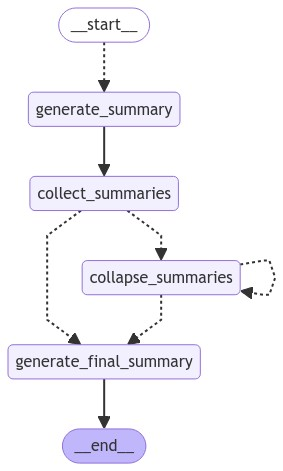

This diagram simply illustrates the **Map-Reduce summarization** process:

1. **Start (`__start__`)**: The summarization process begins.
2. **`generate_summary`**: The text is split into smaller chunks, and each chunk is summarized independently.
3. **`collect_summaries`**: The summaries of the chunks are gathered together.
4. **`collapse_summaries`**: The collected summaries are condensed and merged.
5. **`generate_final_summary`**: The final summary is created and refined.
6. **End (`__end__`)**: The process is completed, and the summary is ready.

This structure is an effective method for handling long texts and generating meaningful summaries.

In summary, this process is a structured approach to summarizing large texts. In the Map phase, the text is split and summarized, and in the Reduce phase, the summaries are combined. This method is used to manage large datasets and optimize the summarization process.

In [17]:
from langchain.text_splitter import RecursiveCharacterTextSplitter

In [18]:
docs

[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [ ]:
# Split to Chunks

final_documents=RecursiveCharacterTextSplitter(chunk_size=2000,chunk_overlap=100).split_documents(docs)
final_documents


[Document(metadata={'source': 'apjspeech.pdf', 'page': 0}, page_content='A P J Abdul Kalam Departing speech \n \n \nFriends, I am delighted to address you all, in the country and those living abroad, after \nworking with you and completing five beautiful and eventful years in Rashtrapati \nBhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I \nenjoyed every minute of my tenure enriched by the wonderful assoc iation from each one \nof you, hailing from different walks of life, be it politics, sci ence and technology, \nacademics, arts, literature, business, judiciary, administration, local bodies, farming, \nhome makers, special children, media and above all from the youth and st udent \ncommunity who are the future wealth of our country. During my intera ction at \nRashtrapati Bhavan in Delhi and at every state and union territor y as well as through my \nonline interactions, I have many unique experiences to share with you, which signify the \nfollowin

In [20]:
len(final_documents)

13

In [ ]:
# Prompt for Map Summarization1

chunks_prompt="""
Please summarize the below speech:
Speech:`{text}'
Summary:
"""
map_prompt_template=PromptTemplate(input_variables=['text'],
                                    template=chunks_prompt)

In [ ]:
# Final Prompt for Map Summarization2

final_prompt='''
Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:{text}

'''
final_prompt_template=PromptTemplate(input_variables=['text'],template=final_prompt)
final_prompt_template

PromptTemplate(input_variables=['text'], input_types={}, partial_variables={}, template='\nProvide the final summary of the entire speech with these important points.\nAdd a Motivation Title,Start the precise summary with an introduction and provide the summary in number \npoints for the speech.\nSpeech:{text}\n\n')

In [ ]:
# Combining the Summarizations

summary_chain=load_summarize_chain(
    llm=llm,
    chain_type="map_reduce",
    map_prompt=map_prompt_template,  
    combine_prompt=final_prompt_template, 
    verbose=True
)

# Run Summarization Chain
output=summary_chain.run(final_documents)
output



> Entering new MapReduceDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:

Please summarize the below speech:
Speech:`A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have ma

Token indices sequence length is longer than the specified maximum sequence length for this model (1770 > 1024). Running this sequence through the model will result in indexing errors



> Finished chain.


> Entering new LLMChain chain...
Prompt after formatting:

Provide the final summary of the entire speech with these important points.
Add a Motivation Title,Start the precise summary with an introduction and provide the summary in number 
points for the speech.
Speech:**Summary:**

Former President of India, A P J Abdul Kalam, delivers a departing speech reflecting on his five-year tenure at Rashtrapati Bhavan. He expresses gratitude for the support of people from diverse backgrounds. Kalam outlines nine important messages he believes are crucial for India's development:

1. Accelerating development, with special focus on youth aspirations.
2. Empowering villages.
3. Enhancing rural competitiveness.
4. Strengthening agricultural growth.
5. Overcoming challenges and achieving success.
6. Importance of partnerships in addressing problems.
7. Resilience in facing calamities.
8. Enhancing connectivity for societal transformation.
9. Preserving national pride.
10. Prom

"## Speech Summary\n\n**Title: Empowering the Nation for a Developed India by 2020**\n\n**1. Gratitude and Reflection:**\n\n- The former President expresses heartfelt gratitude for the support of people from diverse backgrounds during his five-year tenure.\n\n\n**2. Vision for a Developed India:**\n\n- The speaker outlines a vision of a developed India by 2020 characterized by:\n    - Reduced rural-urban divide\n    - Equitable access to energy, water, and education\n    - Strong economy with balanced growth in agriculture, industry, and services\n    - Eradication of poverty, illiteracy, and gender-based violence\n\n\n**3. Empowering the Youth:**\n\n- Emphasis on the importance of empowering the youth through education, leadership development, and skill enhancement.\n- Mention of the Lead India 2020 Foundation and its impactful programs.\n\n\n**4. Focus on Rural Development:**\n\n- Highlight of initiatives to empower villages and enhance rural competitiveness.\n- Mention of the Periya

### <a id='toc1_2_1_'></a>[Refine Chain For Summarization](#toc0_)

The summarization chain can be refined to handle longer or more complex documents more effectively. Techniques like splitting the text into smaller chunks, using specialized prompts for each chunk, and intelligently combining the individual summaries can improve the quality and coherence of the final summary.

Refine Text Summarization: It generates a more synchronized and higher-quality summary.

- First, it takes the initial chunk and generates a summary.
- It then adds the first summary to the second chunk and generates a new summary.
- It continues this process, adding the previous summary to each new chunk to generate an updated summary.
...

This approach helps maintain coherence and quality as the summarization progresses through the text.

In [24]:
# Refined Summarization Chain

chain=load_summarize_chain(
    llm=llm,
    chain_type="refine",
    verbose=True
)
output_summary=chain.run(final_documents)
output_summary



> Entering new RefineDocumentsChain chain...


> Entering new LLMChain chain...
Prompt after formatting:
Write a concise summary of the following:


"A P J Abdul Kalam Departing speech 
 
 
Friends, I am delighted to address you all, in the country and those living abroad, after 
working with you and completing five beautiful and eventful years in Rashtrapati 
Bhavan. Today, it is indeed a thanks giving occasion. I would like to narr ate, how I 
enjoyed every minute of my tenure enriched by the wonderful assoc iation from each one 
of you, hailing from different walks of life, be it politics, sci ence and technology, 
academics, arts, literature, business, judiciary, administration, local bodies, farming, 
home makers, special children, media and above all from the youth and st udent 
community who are the future wealth of our country. During my intera ction at 
Rashtrapati Bhavan in Delhi and at every state and union territor y as well as through my 
online interactions, I have many

"**Refined Summary:**\n\nFormer President A P J Abdul Kalam delivered a departing speech, reflecting on his five-year tenure at Rashtrapati Bhavan. He expressed gratitude for the support of people from diverse backgrounds and outlined ten important messages focusing on development, empowerment, and resilience.\n\nKalam emphasized the need to connect people for societal transformation, citing successful initiatives such as the PURA project. He also addressed the aspirations of the youth to live in a prosperous, safe, and proud India.\n\nThe speech touched upon Kalam's vision for a developed India by 2020, characterized by reduced inequality, access to basic necessities, harmonious growth, and inclusive education. He expressed confidence in the potential of the Indian youth and outlined his vision of a nation where healthcare, governance, and security are paramount.\n\nKalam concluded his address by emphasizing his mission to foster connectivity and empower the people of India, expressin

In [ ]:
# END